Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/adult.csv' )
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Target variable

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

Workclass, Occupation and Native Country have missing values. So we perform tuning on them.

In [11]:
df["native.country"] = df["native.country"].apply(str.strip).replace("?",np.nan)
liste_1 =df["native.country"]

for i in range(0,len(liste_1)):
    if pd.isnull(liste_1[i]):
        liste_1[i] = liste_1[i-1]

df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [12]:
df["occupation"] = df["occupation"].apply(str.strip).replace("?",np.nan)

liste_2 =df["occupation"]

for i in range(0,len(liste_2)):
    if pd.isnull(liste_2[i]):
        liste_2[i] = liste_2[i+1]

df["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', nan, 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [13]:
df["workclass"] = df["workclass"].apply(str.strip).replace("?",np.nan)
liste_3 =df["workclass"]

for i in range(0,len(liste_3)):
    if pd.isnull(liste_3[i]):
        liste_3[i] = liste_3[i+1]

df["workclass"].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', nan, 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
df.isna().sum(axis=0)

age                0
workclass         97
fnlwgt             0
education          0
education.num      0
marital.status     0
occupation        97
relationship       0
race               0
sex                0
capital.gain       0
capital.loss       0
hours.per.week     0
native.country     0
income             0
dtype: int64

Let's check for outliers

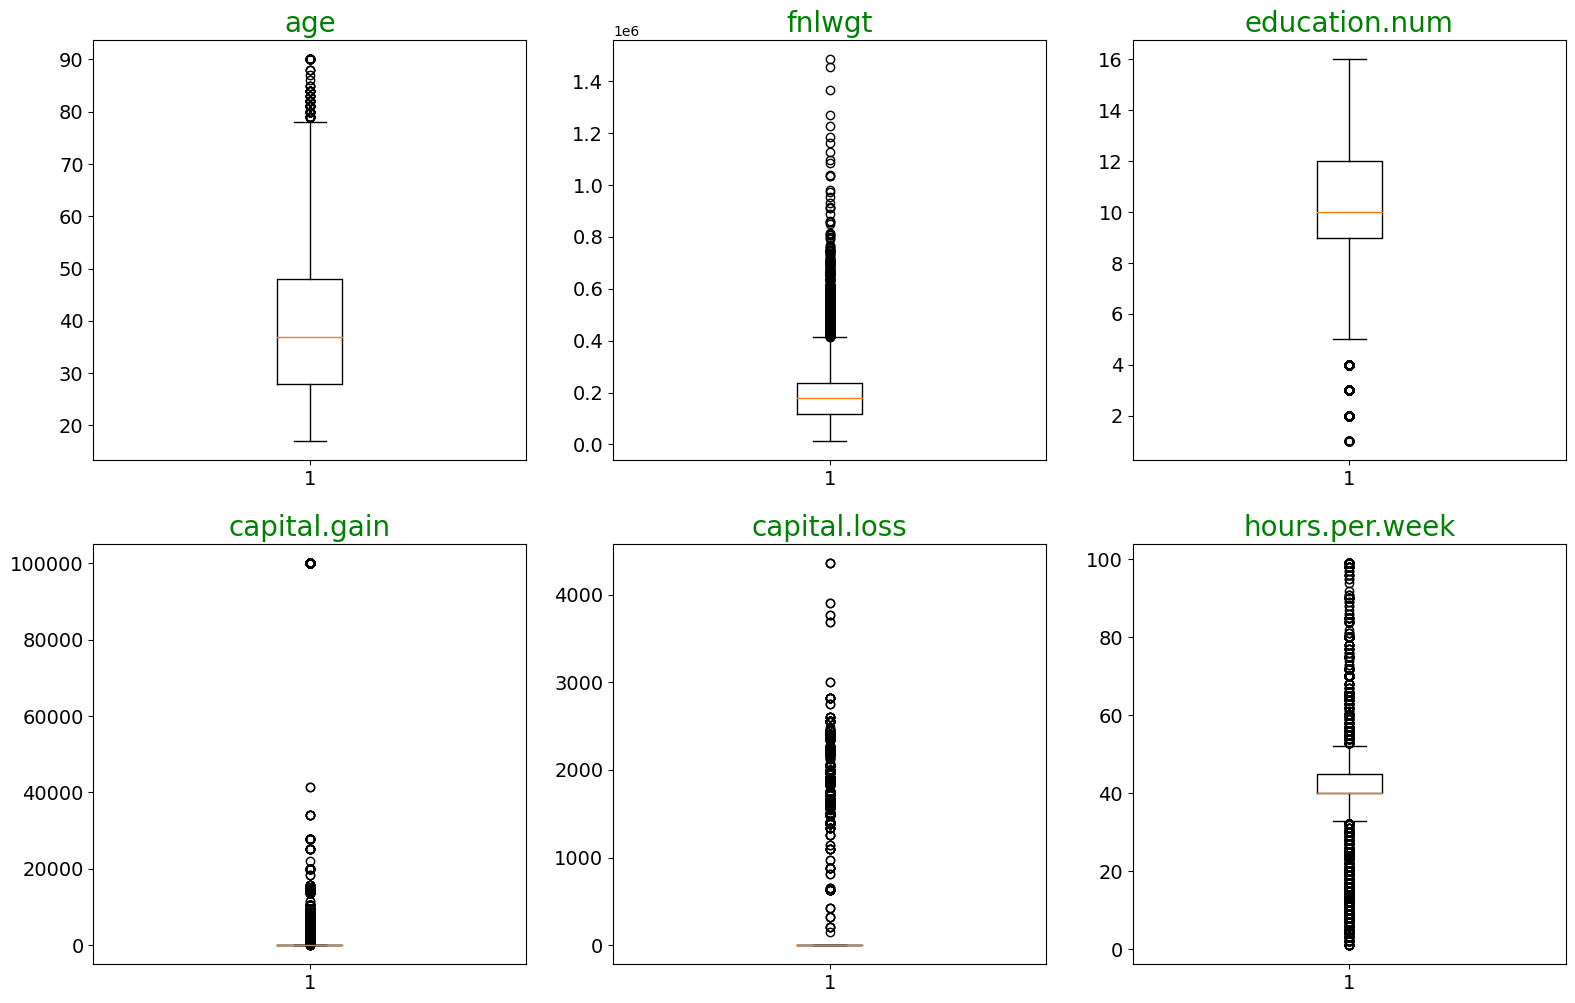

In [15]:
plt.figure(figsize=(19,12))


num_feat = df.select_dtypes(include=['int64']).columns

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[num_feat[i]])
    plt.title(num_feat[i],color="g",fontsize=20)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)


plt.show()

In [16]:
from scipy.stats.mstats import winsorize
df["age"]           = winsorize(df["age"],(0,0.15))
df["fnlwgt"]        = winsorize(df["fnlwgt"],(0,0.15))
df["capital.gain"]  = winsorize(df["capital.gain"],(0,0.099))
df["capital.loss"]  = winsorize(df["capital.loss"],(0,0.099))
df["hours.per.week"]= winsorize(df["hours.per.week"],(0.12,0.18))

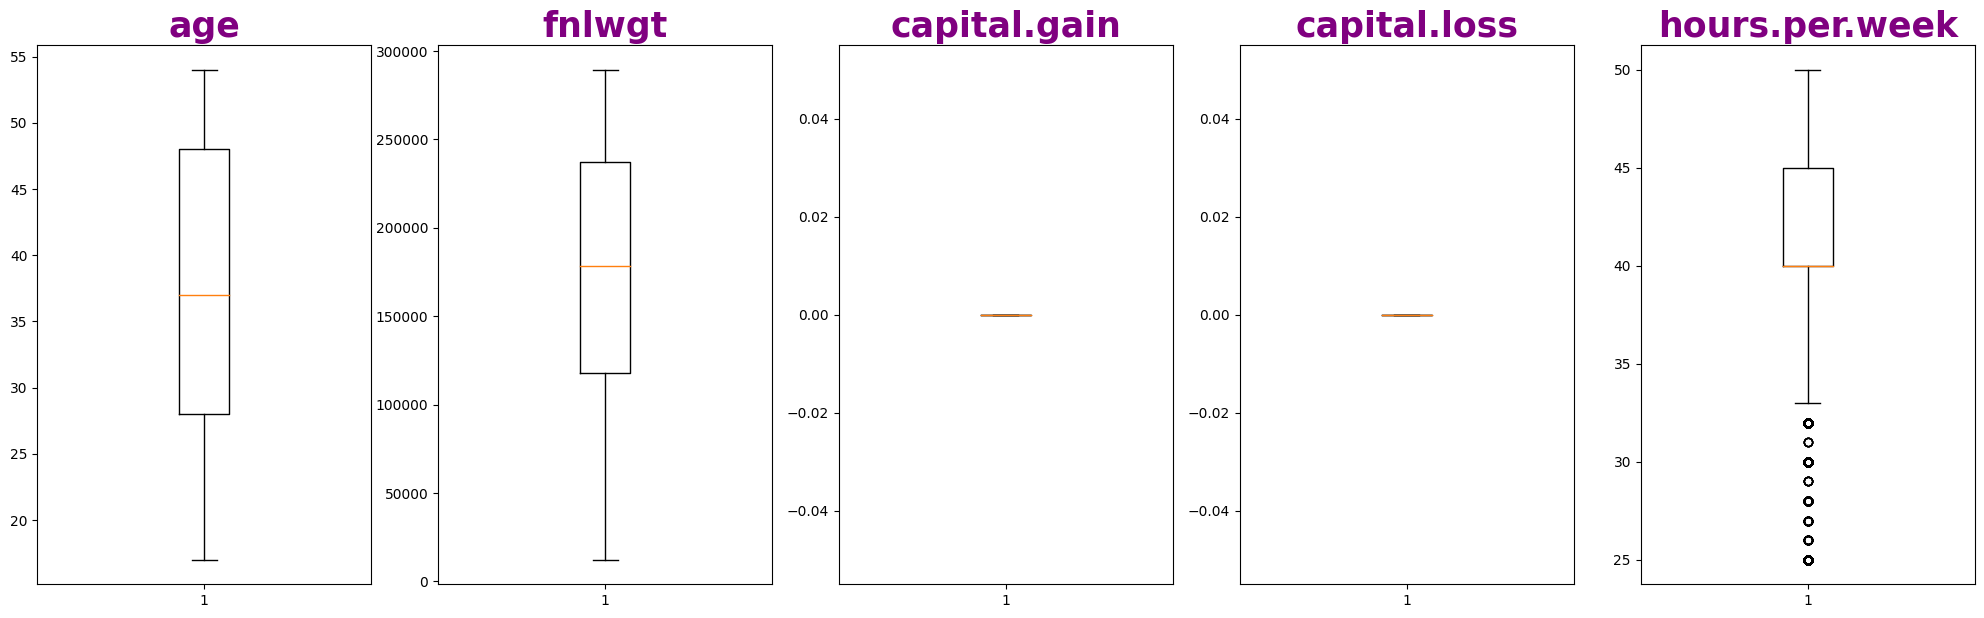

In [17]:
plt.rcParams['figure.figsize'] = (25,7)

baslik_font = {'family':'calibri','color':'purple','weight':'bold','size':25}

col_list=['age',"fnlwgt",'capital.gain', 'capital.loss', 'hours.per.week']

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.boxplot(df[col_list[i]])
    plt.title(col_list[i],fontdict=baslik_font)

plt.show()

Binarisation of output

In [18]:
low = '<=50K'
y = df['income'].apply(lambda x:0 if x==low else 1)

Generate feature set

In [19]:
X = df.drop(['income'],axis=1)

One Hot Encoding for categrorical data

In [20]:
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,54,77053,9,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,54,132870,9,0,0,25,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,54,186061,10,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


Checking if dataset is balanced or not.
We find out that 75% of data lies below 50K while the rest, 25% above it.


Text(0, 0.5, 'Count')

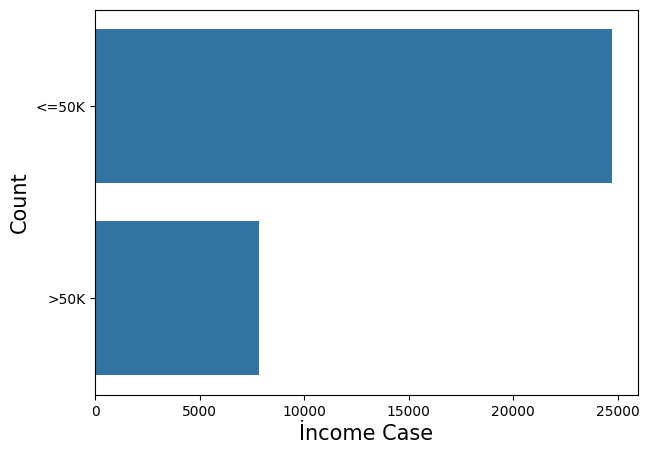

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(df["income"])
plt.xlabel("İncome Case",fontsize=15)
plt.ylabel("Count",fontsize=15)

Data Preparation

In [22]:
y = y.to_numpy()
X = X.to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split data into training and test data. Improvement: usually need validation data for hyperparameter tuning

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)# Fit only to the training data

# Now apply the transformations to both training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MLP Modeling

Direct prediction, accuracy = 81.47

In [23]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


In [24]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8286416214556249


Oversampling

In [25]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Before oversampling:", Counter(y))

oversampler = RandomOverSampler()

X_resampled, y_resampled = oversampler.fit_resample(X, y)

print("After oversampling:", Counter(y_resampled))

Before oversampling: Counter({0: 24720, 1: 7841})
After oversampling: Counter({0: 24720, 1: 24720})


In [26]:
from sklearn.model_selection import train_test_split
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1) #split data into training and test data. Improvement: usually need validation data for hyperparameter tuning

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_o)

X_train_o = scaler.transform(X_train_o)
X_test_o = scaler.transform(X_test_o)

In [27]:
resampled_mlp = MLPClassifier()
resampled_mlp.fit(X_train_o, y_train_o)
predictions = resampled_mlp.predict(X_test_o)

In [28]:
from sklearn import metrics
y_pred_o = resampled_mlp.predict(X_test_o)
print("Oversampling, Accuracy: ", metrics.accuracy_score(y_test_o, y_pred_o))

Oversampling, Accuracy:  0.8391990291262136


a. Hyperparameter tuning using GRID SEARCH on Resampled Data

In [29]:
parameter_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64), (128, 64)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
import time

rs = RandomizedSearchCV(resampled_mlp, parameter_grid, n_iter=3, cv=3, n_jobs=-1)
start_time_cpu = time.time()
rs.fit(X_train_o, y_train_o)
end_time_cpu = time.time()

In [32]:
#set the clf to the best combination of parameters
model_best = rs.best_estimator_
print("best model:", model_best.get_params())
# Fit the best model to the data.
model_best = model_best.fit(X_train, y_train)

best model: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (128, 64), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [33]:
from sklearn import metrics
y_pred = model_best.predict(X_test_o)
print(metrics.accuracy_score(y_test_o, y_pred))

0.7882955771305286


In [34]:
print(f"Running time CPU: {end_time_cpu - start_time_cpu:2f} seconds")

Running time CPU: 900.297205 seconds


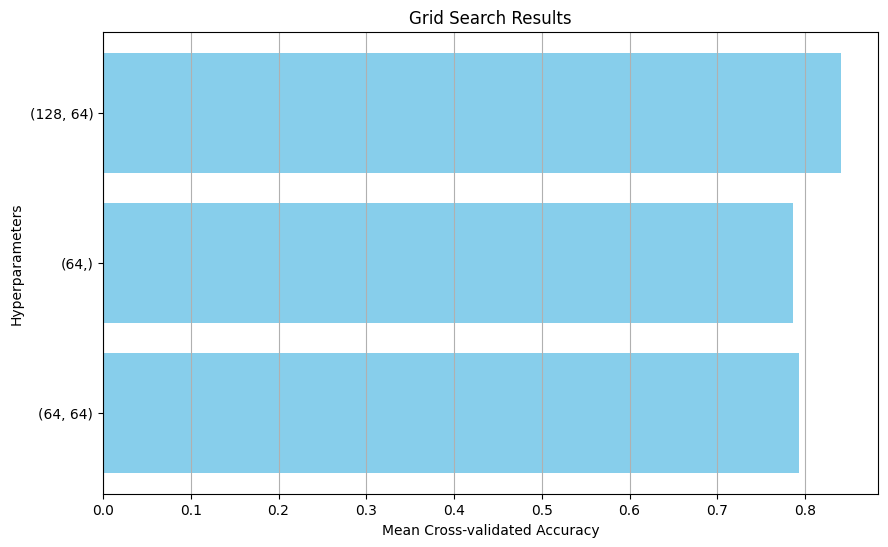

In [35]:
#Plotting parameters along with their scores
mean_scores = rs.cv_results_['mean_test_score']
hidden_layer_sizes = [str(params['hidden_layer_sizes']) for params in rs.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(mean_scores)), mean_scores, color='skyblue')
plt.xlabel('Mean Cross-validated Accuracy')
plt.ylabel('Hyperparameters')
plt.yticks(np.arange(len(mean_scores)), hidden_layer_sizes)
plt.title('Random Search Results')
plt.grid(axis='x')
plt.show()


Now, we perform test using GPU

In [36]:
import tensorflow as tf

In [37]:
if tf.test.is_gpu_available():
    tf.keras.backend.clear_session()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [38]:
X_train_tf = tf.constant(X_train_o, dtype=tf.float32)
y_train_tf = tf.constant(y_train_o, dtype=tf.float32)
X_test_tf = tf.constant(X_test_o, dtype=tf.float32)
y_test_tf = tf.constant(y_test_o, dtype=tf.float32)

In [39]:
mlp_gpu = tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_tf.shape[1],)),
                              tf.keras.layers.Dense(50, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
                              ])

In [40]:
mlp_gpu.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=model_best.get_params()['learning_rate_init']), loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
start_time_gpu = time.time()
mlp_gpu.fit(X_train_tf, y_train_tf, epochs=200, batch_size=model_best.get_params()['batch_size'], verbose=0)
end_time_gpu = time.time()

In [45]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_gpu = mlp_gpu.predict(X_test_tf)
y_pred_gpu = np.round(y_pred_gpu).flatten().astype(int)
accuracy_gpu = accuracy_score(y_test_tf, y_pred_gpu)

print("\nGPU Performance:")
print("Accuracy:", accuracy_gpu)
print(classification_report(y_test_tf, y_pred_gpu))
print(f"GPU Training Time: {end_time_gpu - start_time_gpu:.2f} seconds")

464/464 [==============================] - 3s 7ms/step

GPU Performance:
Accuracy: 0.8580097087378641
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      7485
         1.0       0.81      0.94      0.87      7347

    accuracy                           0.86     14832
   macro avg       0.87      0.86      0.86     14832
weighted avg       0.87      0.86      0.86     14832

GPU Training Time: 211.61 seconds
